## Goal
The goal of this analysis is to understand the global population trends across countries and continents, identify regions with accelerating growth, to find out countries that may represent future population driven market for expansion and oppurtunities.

I wanted to observe the **relative growth patterns** not just the population size.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/world_population_data.csv')
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  world percentage  234 non-null    object 
dt

In [ ]:
df.columns

Index(['rank', 'cca3', 'country', 'continent', '2023 population',
       '2022 population', '2020 population', '2015 population',
       '2010 population', '2000 population', '1990 population',
       '1980 population', '1970 population', 'area (km²)', 'density (km²)',
       'growth rate', 'world percentage'],
      dtype='object')

In [ ]:
df.rename(columns={'cca3':'country_code'}, inplace=True)
df.head()

,rank,country_code,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [ ]:
df.set_index('rank',inplace=True)
df.tail()

,country_code,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
rank,,,,,,,,,,,,,,,,
230,MSR,Montserrat,North America,4386,4390,4500,5059,4938,5138,10805,11452,11402,102.00,43,-0.09%,0.00%
231,FLK,Falkland Islands,South America,3791,3780,3747,3408,3187,3080,2332,2240,2274,12173.00,0,0.29%,0.00%
232,NIU,Niue,Oceania,1935,1934,1942,1847,1812,2074,2533,3637,5185,261.00,7,0.05%,0.00%
233,TKL,Tokelau,Oceania,1893,1871,1827,1454,1367,1666,1669,1647,1714,12.00,189,1.18%,0.00%
234,VAT,Vatican City,Europe,518,510,520,564,596,651,700,733,752,0.44,1177,1.57%,0.00%


In [ ]:
df['world percentage'] = df['world percentage'].str.replace('%','')
df['growth rate'] = df['growth rate'].str.replace('%','')
df.head()

,country_code,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
rank,,,,,,,,,,,,,,,,
1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81,17.85
2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02,17.81
3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50,4.25
4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74,3.47
5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98,3.00


In [ ]:
df = df.astype({'growth rate':'float64','world percentage':'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_code      234 non-null    object 
 1   country           234 non-null    object 
 2   continent         234 non-null    object 
 3   2023 population   234 non-null    int64  
 4   2022 population   234 non-null    int64  
 5   2020 population   234 non-null    int64  
 6   2015 population   234 non-null    int64  
 7   2010 population   234 non-null    int64  
 8   2000 population   234 non-null    int64  
 9   1990 population   234 non-null    int64  
 10  1980 population   234 non-null    int64  
 11  1970 population   234 non-null    int64  
 12  area (km²)        234 non-null    float64
 13  density (km²)     234 non-null    int64  
 14  growth rate       234 non-null    float64
 15  world percentage  234 non-null    float64
dtypes: float64(3), int64(10), object(3)
memory usage:

In [ ]:
df['growth_1970_2023'] = (df['2023 population'] - df['1970 population'])/df['1970 population']
df['growth_2000_2023'] = (df['2023 population'] - df['2000 population'])/df['2000 population']
df.head()

,country_code,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage,growth_1970_2023,growth_2000_2023
rank,,,,,,,,,,,,,,,,,,
1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81,17.85,1.562555,0.348228
2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02,17.81,0.733266,0.127816
3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50,4.25,0.697197,0.203960
4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74,3.47,1.408557,0.296450
5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98,3.00,3.056032,0.557853


In [ ]:
df.describe()

,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage,growth_1970_2023,growth_2000_2023
count,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.437442e+07,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814500e+05,451.282051,0.973675,0.429444,1.914815,0.389000
std,1.373864e+08,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,1979.398922,1.234990,1.716421,2.846722,0.436037
min,5.180000e+02,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,4.400000e-01,0.000000,-7.450000,0.000000,-0.626808,-0.380169
25%,4.225982e+05,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,39.500000,0.232500,0.010000,0.360168,0.082082
50%,5.643895e+06,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,97.500000,0.820000,0.070000,1.341163,0.303787
75%,2.324537e+07,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,242.750000,1.685000,0.290000,2.695543,0.607847
max,1.428628e+09,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,21403.000000,4.980000,17.850000,30.926809,3.205350


In [ ]:
df.isna().sum()

,0
country_code,0
country,0
continent,0
2023 population,0
2022 population,0
2020 population,0
2015 population,0
2010 population,0
2000 population,0
1990 population,0


In [ ]:
df.duplicated().sum()

np.int64(0)

### Population Distribution Overview

>Population values vary drastically across countries, ranging from a few hundred people to over a billion.  
>To avoid large countries dominating the analysis, i used log scaling.

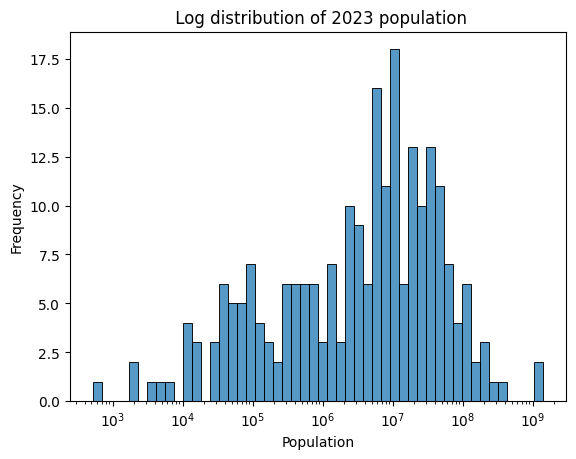

In [ ]:
sns.histplot(df["2023 population"], bins=50, log_scale=True)
plt.title(" Log distribution of 2023 population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

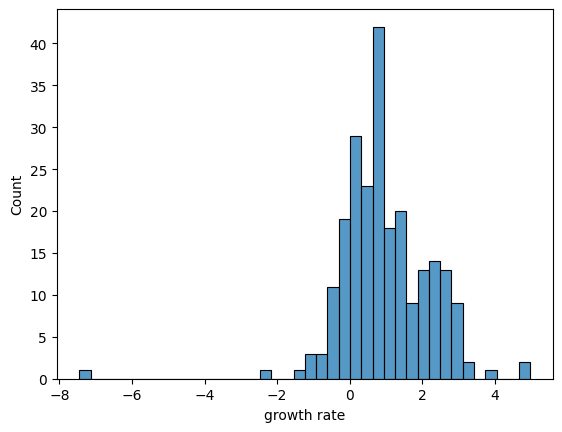

In [ ]:
sns.histplot(df["growth rate"], bins=40)
plt.show()

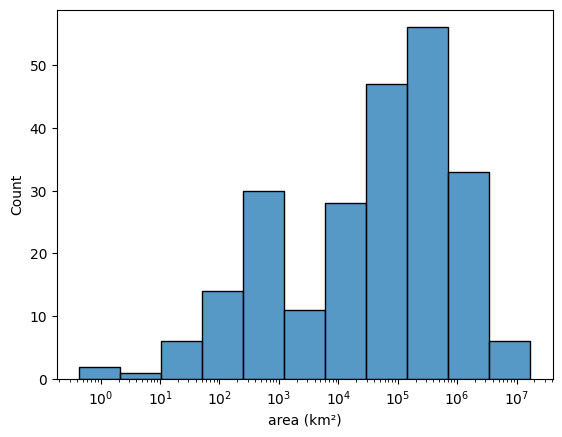

In [ ]:
sns.histplot(df["area (km²)"], log_scale=True)
plt.show()

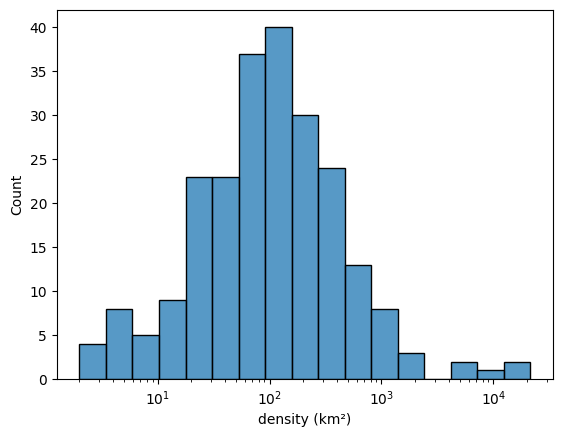

In [ ]:
sns.histplot(df["density (km²)"], log_scale=True)
plt.show()

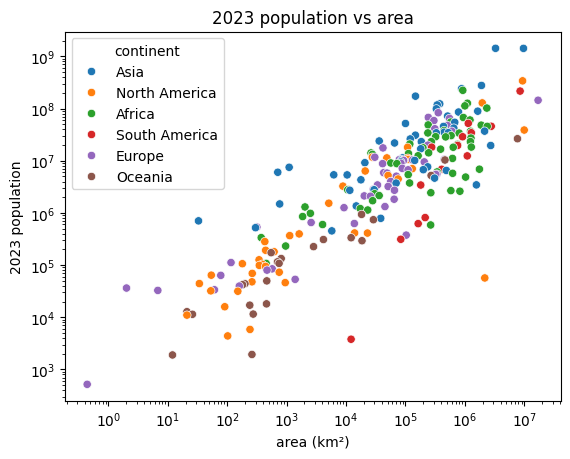

In [ ]:
sns.scatterplot(
    x="area (km²)",
    y="2023 population",
    hue="continent",
    data=df
)
plt.title("2023 population vs area")
plt.xscale("log")
plt.yscale("log")

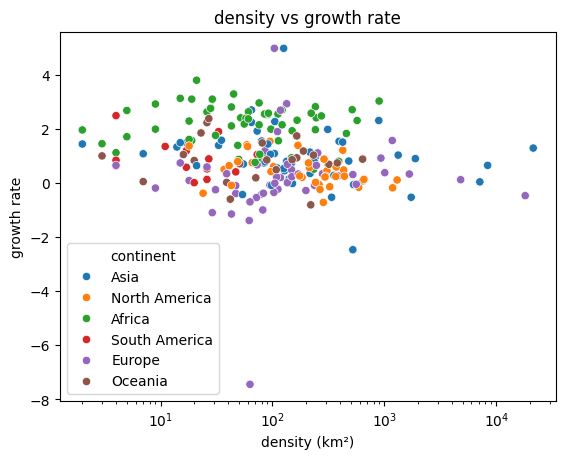

In [ ]:
sns.scatterplot(
    x="density (km²)",
    y="growth rate",
    hue="continent",
    data=df
)
plt.title('density vs growth rate')
plt.xscale("log")
plt.show()

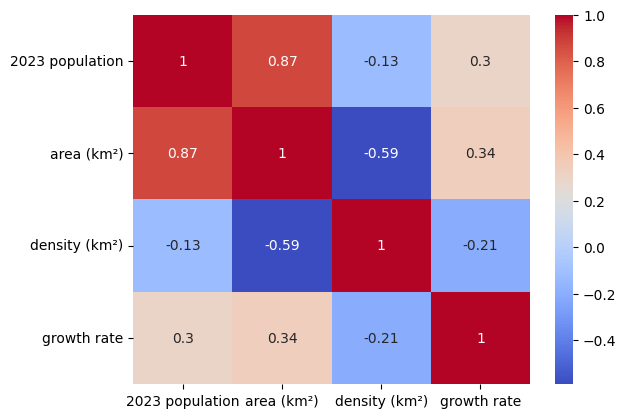

In [ ]:
df_log = df[["2023 population","area (km²)","density (km²)","growth rate"]].apply(np.log1p)
sns.heatmap(df_log.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
df.groupby("continent")["2023 population"].sum().sort_values(ascending=False)

,2023 population
continent,
Asia,4751819588
Africa,1460476458
Europe,741869197
North America,604155369
South America,439719009
Oceania,45575769


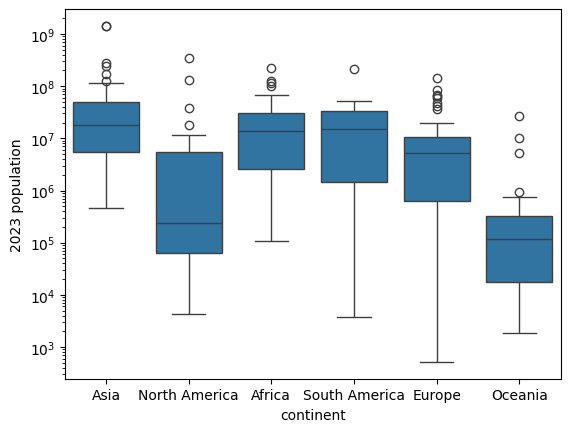

In [ ]:
sns.boxplot(x="continent", y="2023 population", data=df)
plt.yscale("log")

In [ ]:
years = [
    "1970 population","1980 population","1990 population",
    "2000 population","2010 population","2015 population",
    "2020 population","2022 population","2023 population"
]

continent_trend = df.groupby("continent")[years].sum().T
continent_trend


continent,Africa,Asia,Europe,North America,Oceania,South America
1970 population,365444348,2144906290,655923991,315434606,19480270,192947156
1980 population,481536379,2635334228,692527159,368293362,22920240,241789006
1990 population,638150629,3210563577,720320797,421266425,26743822,297146415
2000 population,818946032,3735089604,726093423,486069584,31222778,349634282
2010 population,1055228072,4220041327,735613936,542720651,37102764,393078250
2015 population,1201102442,4458250182,741535608,570383850,40403283,413134396
2020 population,1360671810,4663086535,745792196,594236593,43933426,431530043
2022 population,1426730933,4721383274,743147538,600296136,45038554,436816608
2023 population,1460476458,4751819588,741869197,604155369,45575769,439719009


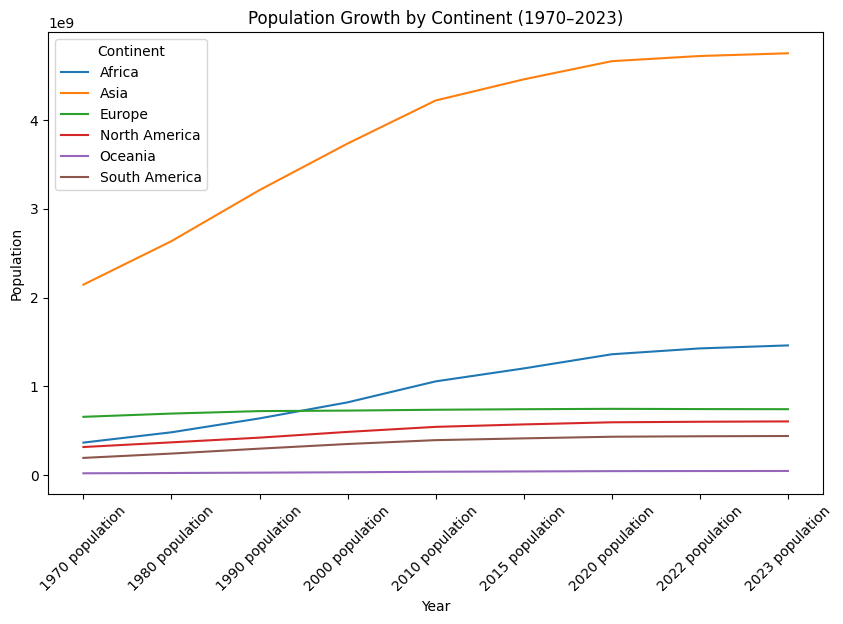

In [ ]:
continent_trend.plot(figsize=(10,6))
plt.title("Population Growth by Continent (1970–2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.legend(title="Continent")
plt.show()

### Observation

>Clear regional differences are visible in population growth  
Africa shows consistent higher growth rates, while Europe shows signs of decline.

>This shows that future population driven demand is possibly to go toward higher growth regions.


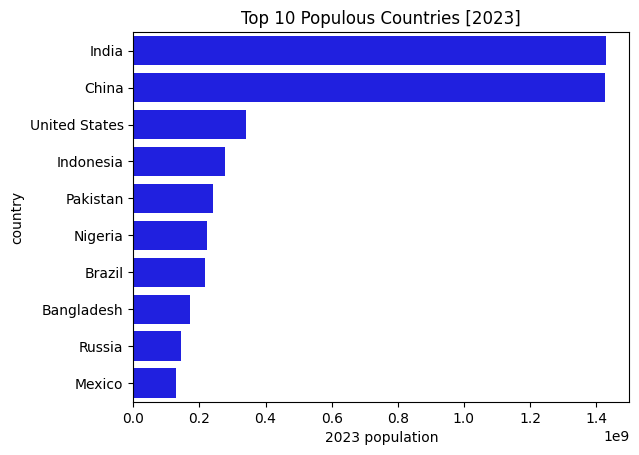

In [ ]:
top_10 = df.nlargest(10, "2023 population")[["country", "2023 population"]]
least_10 = df.nsmallest(10, "2023 population")[["country", "2023 population"]]
sns.barplot(x="2023 population", y="country", data=top_10, color="blue")
plt.title("Top 10 Populous Countries [2023]")
plt.show()

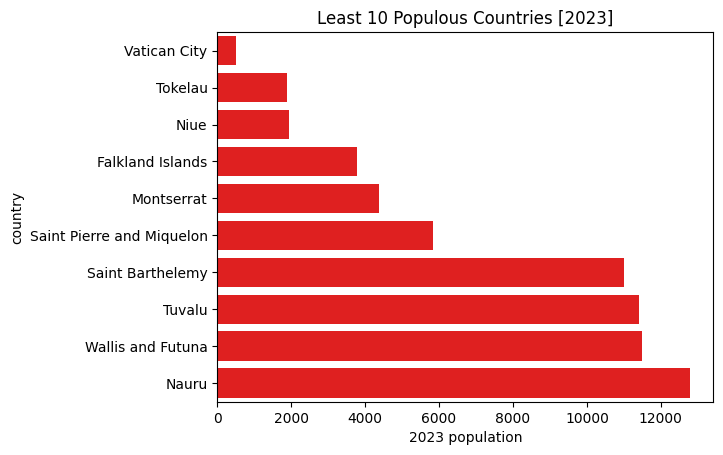

In [ ]:
sns.barplot(x="2023 population", y="country", data=least_10, color="red")
plt.title("Least 10 Populous Countries [2023]")
plt.show()

### Identifying Emerging Population Markets

Population size shows current scale, but does not gives future rate.
To identify growing population markets, countries are evaluated based on **relative population growth**
rather than size alone.


In [ ]:
df["growth_2000_2023"] = (df["2023 population"] - df["2000 population"])/df["2000 population"]
fastest_growth = df.nlargest(10,"growth_2000_2023")[["country", "continent", "growth_2000_2023"]]
fastest_growth


,country,continent,growth_2000_2023
rank,,,
143,Qatar,Asia,3.205350
96,United Arab Emirates,Asia,1.905619
152,Equatorial Guinea,Africa,1.503253
212,Turks and Caicos Islands,North America,1.457426
54,Niger,Africa,1.340500
83,Jordan,Asia,1.242220
42,Angola,Africa,1.237652
129,Kuwait,Asia,1.227560
67,Chad,Africa,1.213133


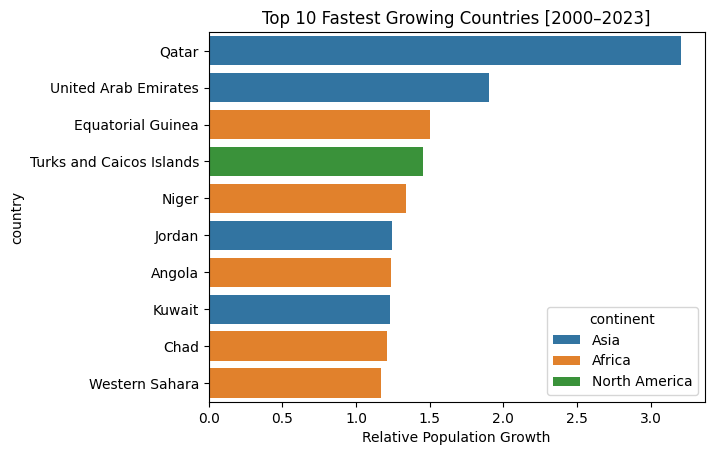

In [ ]:
sns.barplot(data=fastest_growth,y="country",x="growth_2000_2023",hue="continent")
plt.title("Top 10 Fastest Growing Countries [2000–2023]")
plt.xlabel("Relative Population Growth")
plt.show()


### Observation

>Several high growth countries have relatively smaller population.
>Despite limited current population, these countries may represent future expansion opportunities as their populations continue to grow.


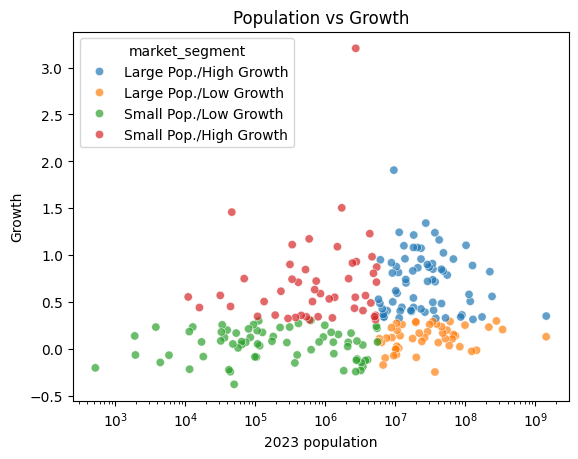

In [ ]:
df["population_segment"] = np.where(df["2023 population"] >= df["2023 population"].median(),"Large Pop.","Small Pop.")
df["growth_segment"] = np.where(df["growth_2000_2023"] >= df["growth_2000_2023"].median(),"High Growth","Low Growth")

df["market_segment"] = df["population_segment"]+"/"+df["growth_segment"]

sns.scatterplot(data=df,x='2023 population',y='growth_2000_2023',hue='market_segment',alpha=0.7)

plt.title('Population vs Growth')
plt.xscale('log')
plt.ylabel('Growth')
plt.show()

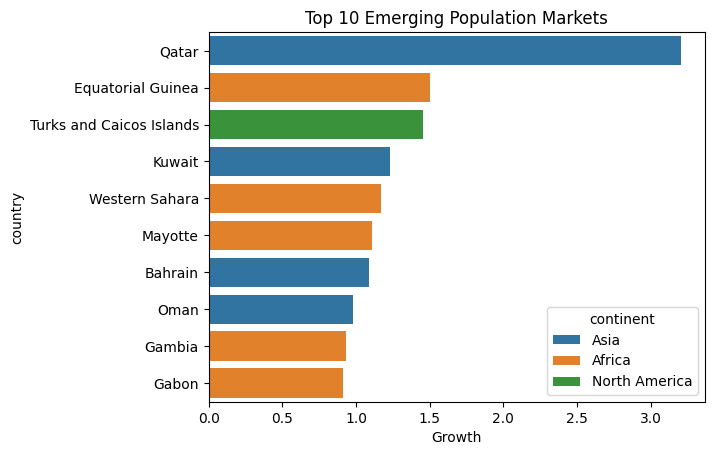

In [ ]:
emerging_markets = df[(df['2023 population'] < df['2023 population'].median()) &(df['growth_2000_2023'] >= df['growth_2000_2023'].median())]
top_emerging = emerging_markets.nlargest(10, 'growth_2000_2023')[['country','continent','2023 population', 'growth_2000_2023']]
sns.barplot(data=top_emerging,x='growth_2000_2023',y='country',hue='continent')
plt.title('Top 10 Emerging Population Markets')
plt.xlabel('Growth')
plt.show()


## Outcomes

- Global population data is highly skewed and dominated by a small number of countries
- Relative growth metrics provide better signals than population size for future planning  
- Africa contains a future for high growth countries
